# Micro benchmarks

In [2]:
import sys 
import os
import sympy
from sympy import Symbol as sb
sys.path.append(os.getcwd())
from zono_reg import *
from error_injection import MissingValueError, SamplingError, Injector
global symbol_id

# Varying uncertainty measure range

In [2]:
n = 400
X = np.random.randn(n, 9)
X = X + 5
X[:, 0] *= 2
epsilon = 0.3 * np.random.randn(n,)
Y = X[:, 0] + X[:, 1] + 2*X[:, 2] + 3*X[:, 3] + 4*X[:, 4] + 5*X[:, 5] + 6*X[:, 6] + 7*X[:, 7] + 8*X[:, 8] + 5 + epsilon
X_train_o = pd.DataFrame(X)
y_train_o = pd.DataFrame(Y)

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []
for mv_num in tqdm(range(2,50,5), desc='Test'):
    global symbol_id
    symbol_id = -1
    # inject into horsepower (3rd col in X)
    X_train = X_train_o.copy()
    y_train = y_train_o.copy()
    mv_err = MissingValueError(2, pattern=None, ratio=mv_num/len(X_train))
    dirty_X_train, dirty_y_train, _, _ = mv_err.inject(X_train.copy(), y_train.copy(), X_train, y_train)
    X_train = dirty_X_train.to_numpy()
    y_train = dirty_y_train.to_numpy().ravel()
    X_extended = np.append(np.ones((len(X_train), 1)), X_train, axis=1)
    ss = StandardScaler()
    X_extended[:, 1:] = ss.fit_transform(X_extended[:, 1:])

    imputed = impute_data(X_extended)
    symbolic, symbols_in_data, XS, XR = data_to_symbol(imputed)

    param_fp = fixed_point(XS,XR,y_train,symbolic)
    
    param_samp, mse_samp = sample_fixed_point(imputed, y_train, 10000, True)
    
    param_samp_low, mse_samp_low = sample_fixed_point(imputed, y_train, 1000, True)

#     param_gd = train_model(symbolic, symbols_in_data, y_train, N = 400, lamb = 0.2, num_attrs = 8, merge_budget = 20)
    x.append(float('%.2f'%(mv_num/len(X_train))))
    fp_res.append(get_metric("fp", param_fp, "mse", symbolic, y_train))
    samp_res.append(get_metric("s", mse_samp, "mse"))
    samp_low_res.append(get_metric("s", mse_samp_low, "mse"))
    
plotError([samp_low_res,samp_res,fp_res],["1k","10k","FP"],x,"test1","uncertain ratio","loss")

Test:   0%|          | 0/10 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Varying uncertain range measure range

Test:   0%|          | 0/7 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

(3, 7, 3)


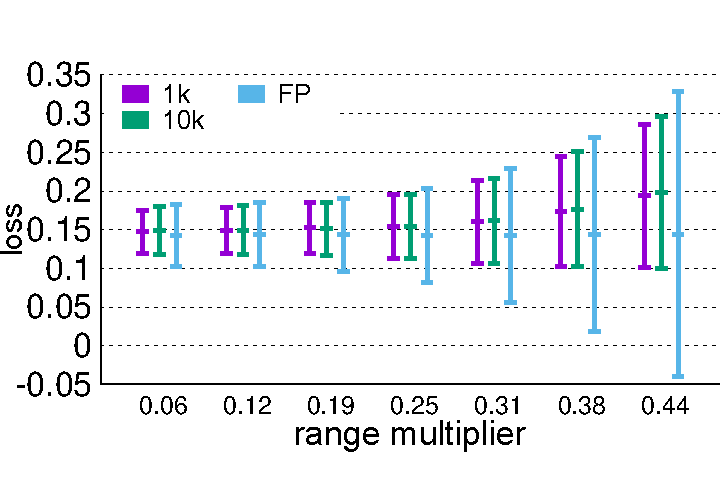

'/Users/sufeng/git/ML_AUDB/symbolic/test2/data.pdf'

In [3]:
n = 400
X = np.random.randn(n, 9)
X = X + 5
X[:, 0] *= 2
epsilon = 0.3 * np.random.randn(n,)
Y = X[:, 0] + X[:, 1] + 2*X[:, 2] + 3*X[:, 3] + 4*X[:, 4] + 5*X[:, 5] + 6*X[:, 6] + 7*X[:, 7] + 8*X[:, 8] + 5 + epsilon
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(Y)

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []

mv_err = MissingValueError(2, pattern=None, ratio=0.02)
dirty_X_train, dirty_y_train, _, _ = mv_err.inject(X_train.copy(), y_train.copy(), X_train, y_train)
y_train = dirty_y_train.to_numpy().ravel()
X_train = dirty_X_train.to_numpy()
X_extended = np.append(np.ones((len(X_train), 1)), X_train, axis=1)
null_pos = np.argwhere(np.isnan(X_extended))
ss = StandardScaler()
X_extended[:, 1:] = ss.fit_transform(X_extended[:, 1:])

imputed = impute_data(X_extended)

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []
for rg_num in tqdm(range(1,8,1), desc='Test'):
    global symbol_id
    symbol_id = -1
#     # inject into horsepower (3rd col in X)

    cur_imputed = imputed.copy()
    
    for pos in null_pos:
        cur_imputed[3][pos[0]][pos[1]] = cur_imputed[3][pos[0]][pos[1]] + rg_num/32
        cur_imputed[2][pos[0]][pos[1]] = cur_imputed[2][pos[0]][pos[1]] + (rg_num/64)
        cur_imputed[1][pos[0]][pos[1]] = cur_imputed[1][pos[0]][pos[1]] - (rg_num/64)
        cur_imputed[0][pos[0]][pos[1]] = cur_imputed[0][pos[0]][pos[1]] - rg_num/32
                               
    symbolic, symbols_in_data, XS, XR = data_to_symbol(cur_imputed)

    param_fp = fixed_point(XS,XR,y_train,symbolic)
    
    param_samp, mse_samp = sample_fixed_point(cur_imputed, y_train, 10000, True)
    
    param_samp_low, mse_samp_low = sample_fixed_point(cur_imputed, y_train, 1000, True)

# #     param_gd = train_model(symbolic, symbols_in_data, y_train, N = 400, lamb = 0.2, num_attrs = 8, merge_budget = 20)
#     gd_res.append(param_gd)

    x.append(float('%.2f'%(rg_num/16)))
    fp_res.append(get_metric("fp", param_fp, "mse", symbolic, y_train))
    samp_res.append(get_metric("s", mse_samp, "mse"))
    samp_low_res.append(get_metric("s", mse_samp_low, "mse"))

plotError([samp_low_res,samp_res,fp_res],["1k","10k","FP"],x,"test2","range multiplier","loss")

# Varying dimension measure loss

Test:   0%|          | 0/9 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

(3, 9, 3)


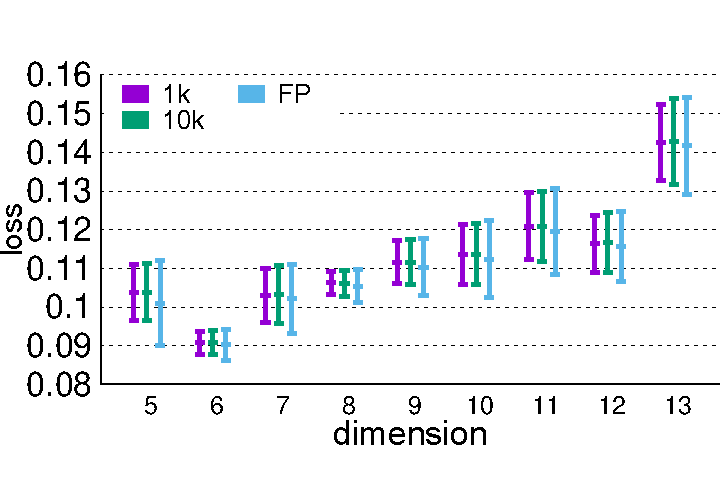

'/Users/sufeng/git/ML_AUDB/symbolic/test3/data.pdf'

In [4]:
n = 400

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []

for dim in tqdm(range(5,14,1), desc='Test'):
    global symbol_id
    symbol_id = -1
    
    X = np.random.randn(n, dim)
    X = X + 5
    X[:, 0] *= 2
    Y = 5 + epsilon
    epsilon = 0.3 * np.random.randn(n,)
    for i in range(dim):
        Y = Y + X[:, i] 
    X_train = pd.DataFrame(X)
    y_train = pd.DataFrame(Y)

    mv_err = MissingValueError(2, pattern=None, ratio=0.02)
    dirty_X_train, dirty_y_train, _, _ = mv_err.inject(X_train.copy(), y_train.copy(), X_train, y_train)
    y_train = dirty_y_train.to_numpy().ravel()
    X_train = dirty_X_train.to_numpy()
    X_extended = np.append(np.ones((len(X_train), 1)), X_train, axis=1)
    ss = StandardScaler()
    X_extended[:, 1:] = ss.fit_transform(X_extended[:, 1:])
    
    cur_X_extended = X_extended

    imputed = impute_data(cur_X_extended)
    symbolic, symbols_in_data, XS, XR = data_to_symbol(imputed)

    param_fp = fixed_point(XS,XR,y_train,symbolic)
    
    param_samp, mse_samp = sample_fixed_point(imputed, y_train, 10000, True)
    
    param_samp_low, mse_samp_low = sample_fixed_point(imputed, y_train, 1000, True)

#     param_gd = train_model(symbolic, symbols_in_data, y_train, N = 400, lamb = 0.2, num_attrs = 8, merge_budget = 20)
    x.append(dim)
    fp_res.append(get_metric("fp", param_fp, "mse", symbolic, y_train))
    samp_res.append(get_metric("s", mse_samp, "mse"))
    samp_low_res.append(get_metric("s", mse_samp_low, "mse"))

plotError([samp_low_res,samp_res,fp_res],["1k","10k","FP"],x,"test3","dimension","loss")

# Test sample range varying number of samples

Test:   0%|          | 0/13 [00:00<?, ?it/s]

Samples:   0%|          | 0/5 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/500 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Samples:   0%|          | 0/2000 [00:00<?, ?it/s]

Samples:   0%|          | 0/3000 [00:00<?, ?it/s]

Samples:   0%|          | 0/4000 [00:00<?, ?it/s]

Samples:   0%|          | 0/5000 [00:00<?, ?it/s]

Samples:   0%|          | 0/6000 [00:00<?, ?it/s]

Samples:   0%|          | 0/7000 [00:00<?, ?it/s]

Samples:   0%|          | 0/8000 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Samples:   0%|          | 0/30000 [00:00<?, ?it/s]

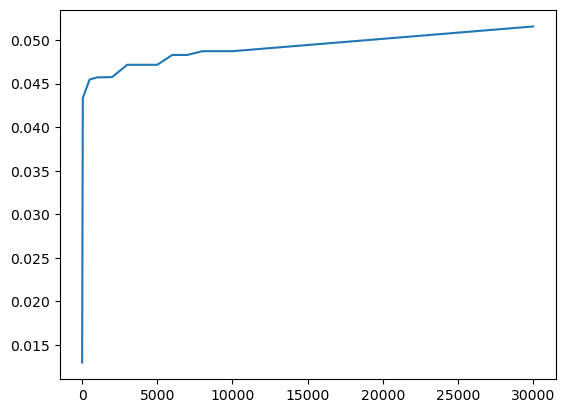

In [13]:
n = 400
X = np.random.randn(n, 12)
X = X + 5
X[:, 0] *= 2
epsilon = 0.3 * np.random.randn(n,)
Y = X[:, 0] + X[:, 1] + 2*X[:, 2] + 3*X[:, 3] + 4*X[:, 4] + 5*X[:, 5] + 6*X[:, 6] + 7*X[:, 7] + 8*X[:, 8] + 3*X[:, 1] + 9*X[:, 9] + 10*X[:, 10] + 11*X[:, 11] + 5 + epsilon
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(Y)

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []

mv_err = MissingValueError(2, pattern=None, ratio=0.02)
dirty_X_train, dirty_y_train, _, _ = mv_err.inject(X_train.copy(), y_train.copy(), X_train, y_train)
y_train = dirty_y_train.to_numpy().ravel()
X_train = dirty_X_train.to_numpy()
X_extended = np.append(np.ones((len(X_train), 1)), X_train, axis=1)
ss = StandardScaler()
X_extended[:, 1:] = ss.fit_transform(X_extended[:, 1:])

imputed = impute_data(X_extended)

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []

nsample = [5,50,500,1000,2000,3000,4000,5000,6000,7000,8000,10000,30000]

for sp_num in tqdm(nsample, desc='Test'):
    global symbol_id
    symbol_id = -1
#     # inject into horsepower (3rd col in X)
    
    param_samp, mse_samp = sample_fixed_point(imputed, y_train, sp_num, True)

# #     param_gd = train_model(symbolic, symbols_in_data, y_train, N = 400, lamb = 0.2, num_attrs = 8, merge_budget = 20)
#     gd_res.append(param_gd)

    x.append(sp_num)
    samp_res.append(get_metric("s", mse_samp, "mse"))

plt.plot(x, samp_res)

# Ground truth

Test:   0%|          | 0/9 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

(3, 9, 3)


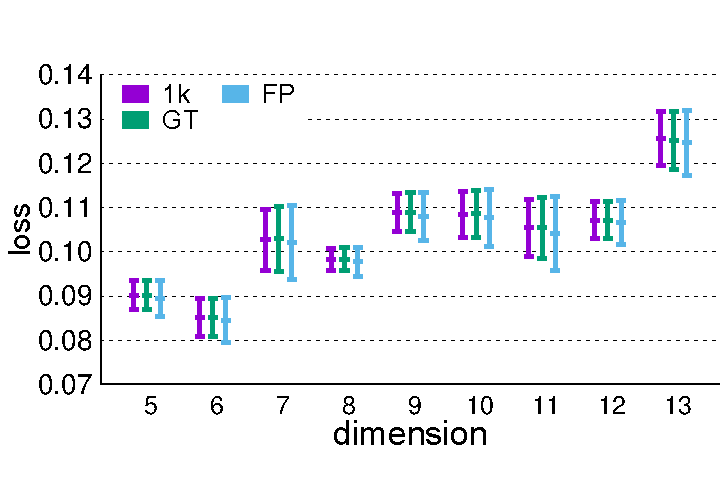

'/Users/sufeng/git/ML_AUDB/symbolic/test3_gt/data.pdf'

In [3]:
n = 400

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []

for dim in tqdm(range(5,14,1), desc='Test'):
    global symbol_id
    symbol_id = -1
    
    X = np.random.randn(n, dim)
    X = X + 5
    X[:, 0] *= 2
    Y = 5 + epsilon
    epsilon = 0.3 * np.random.randn(n,)
    for i in range(dim):
        Y = Y + X[:, i] 
    X_train = pd.DataFrame(X)
    y_train = pd.DataFrame(Y)

    mv_err = MissingValueError(2, pattern=None, ratio=0.015)
    dirty_X_train, dirty_y_train, _, _ = mv_err.inject(X_train.copy(), y_train.copy(), X_train, y_train)
    y_train = dirty_y_train.to_numpy().ravel()
    X_train = dirty_X_train.to_numpy()
    X_extended = np.append(np.ones((len(X_train), 1)), X_train, axis=1)
    ss = StandardScaler()
    X_extended[:, 1:] = ss.fit_transform(X_extended[:, 1:])
    
    cur_X_extended = X_extended

    imputed = impute_data(cur_X_extended)
    symbolic, symbols_in_data, XS, XR = data_to_symbol(imputed)

    param_fp = fixed_point(XS,XR,y_train,symbolic)
    
    param_samp, mse_samp = ground_truth_fixed_point(imputed, y_train, cur_X_extended, True)
    
    param_samp_low, mse_samp_low = sample_fixed_point(imputed, y_train, 1000, True)

#     param_gd = train_model(symbolic, symbols_in_data, y_train, N = 400, lamb = 0.2, num_attrs = 8, merge_budget = 20)
    x.append(dim)
    fp_res.append(get_metric("fp", param_fp, "mse", symbolic, y_train))
    samp_res.append(get_metric("s", mse_samp, "mse"))
    samp_low_res.append(get_metric("s", mse_samp_low, "mse"))

plotError([samp_low_res,samp_res,fp_res],["1k","GT","FP"],x,"test3_gt","dimension","loss")

Test:   0%|          | 0/7 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

All PWs:   0%|          | 0/4096 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

(3, 7, 3)


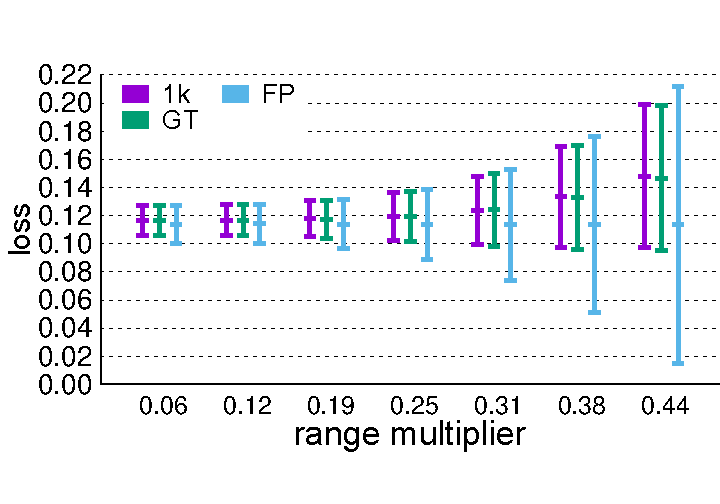

'/Users/sufeng/git/ML_AUDB/symbolic/test2_gt/data.pdf'

In [4]:
n = 400
X = np.random.randn(n, 9)
X = X + 5
X[:, 0] *= 2
epsilon = 0.3 * np.random.randn(n,)
Y = X[:, 0] + X[:, 1] + 2*X[:, 2] + 3*X[:, 3] + 4*X[:, 4] + 5*X[:, 5] + 6*X[:, 6] + 7*X[:, 7] + 8*X[:, 8] + 5 + epsilon
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(Y)

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []

mv_err = MissingValueError(2, pattern=None, ratio=0.015)
dirty_X_train, dirty_y_train, _, _ = mv_err.inject(X_train.copy(), y_train.copy(), X_train, y_train)
y_train = dirty_y_train.to_numpy().ravel()
X_train = dirty_X_train.to_numpy()
X_extended = np.append(np.ones((len(X_train), 1)), X_train, axis=1)
null_pos = np.argwhere(np.isnan(X_extended))
ss = StandardScaler()
X_extended[:, 1:] = ss.fit_transform(X_extended[:, 1:])

imputed = impute_data(X_extended)

fp_res = []
samp_res = []
samp_low_res = []
gd_res = []
x = []
for rg_num in tqdm(range(1,8,1), desc='Test'):
    global symbol_id
    symbol_id = -1
#     # inject into horsepower (3rd col in X)

    cur_imputed = imputed.copy()
    
    for pos in null_pos:
        cur_imputed[3][pos[0]][pos[1]] = cur_imputed[3][pos[0]][pos[1]] + rg_num/32
        cur_imputed[2][pos[0]][pos[1]] = cur_imputed[2][pos[0]][pos[1]] + (rg_num/64)
        cur_imputed[1][pos[0]][pos[1]] = cur_imputed[1][pos[0]][pos[1]] - (rg_num/64)
        cur_imputed[0][pos[0]][pos[1]] = cur_imputed[0][pos[0]][pos[1]] - rg_num/32
                               
    symbolic, symbols_in_data, XS, XR = data_to_symbol(cur_imputed)

    param_fp = fixed_point(XS,XR,y_train,symbolic)
    
    param_samp, mse_samp = ground_truth_fixed_point(cur_imputed, y_train, X_extended, True)
    
    param_samp_low, mse_samp_low = sample_fixed_point(cur_imputed, y_train, 1000, True)

# #     param_gd = train_model(symbolic, symbols_in_data, y_train, N = 400, lamb = 0.2, num_attrs = 8, merge_budget = 20)
#     gd_res.append(param_gd)

    x.append(float('%.2f'%(rg_num/16)))
    fp_res.append(get_metric("fp", param_fp, "mse", symbolic, y_train))
    samp_res.append(get_metric("s", mse_samp, "mse"))
    samp_low_res.append(get_metric("s", mse_samp_low, "mse"))

plotError([samp_low_res,samp_res,fp_res],["1k","GT","FP"],x,"test2_gt","range multiplier","loss")